# Сборный проект 1

Описание проекта  
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


Описание данных  

•	Name — название игры  
•	Platform — платформа  
•	Year_of_Release — год выпуска  
•	Genre — жанр игры  
•	NA_sales — продажи в Северной Америке (миллионы проданных копий)  
•	EU_sales — продажи в Европе (миллионы проданных копий)  
•	JP_sales — продажи в Японии (миллионы проданных копий)  
•	Other_sales — продажи в других странах (миллионы проданных копий)  
•	Critic_Score — оценка критиков (максимум 100)  
•	User_Score — оценка пользователей (максимум 10)  
•	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


*План работы над проектом:*  
1. Просмотреть таблицу и выявить аномалии и пропущенные значения.
2. Провести предобработку таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
3. Провести анализ по данным и подготовить актуальные данные.
4. Составить портреты пользователей для крупных регионов продаж.
5. Выполнить проверку гипотез.  
Оформить проект и сделать выводы по каждому шагу.

#### шаг. Загрузка данных

In [1]:
#импорт всех библиотек в одной ячейке
import pandas as pd
import numpy as np 
from scipy import stats as st
#from scipy.stats import binom
from math import sqrt
from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt
from scipy.stats import binom, norm

Путь к файлу: /datasets/games.csv. 

In [2]:
games_df = pd.read_csv('/datasets/games.csv')

In [3]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-info">
<b>Вывод 1:</b> 
 
    
Мы выгрузили таблицу и присвоили переменной games_df, и импортировали все необходимые библиотеки, которые будут нужны для дальнейшей работы. Далее мы с помощью метода info() проверили какие типы данные в каждом столбце и выяснили, что необходимо изменить тип данных в двух столбцах: Year_of_Release (с float64 на int), User_Score (с object на float64).
    
Проверили уникальные значения в ячейках таблицы и выяснили, что с некоторыми значениями необходимо поработать, а именно:
Столбцы Year_of_Release, Genre, Critic_Score, User_Score и Rating - содержат NaN;  
столбец User_Score также содержит tbd.
</div>

#### шаг . Подготовьте данные

•	2.1. Замените названия столбцов (приведите к нижнему регистру);

In [4]:
games_df=games_df.rename(columns={"Name":"name",
                                  "Platform":"platform",
                                  "Year_of_Release":"year_of_release",
                                  "Genre":"genre",
                                  "NA_sales":"na_sales",
                                  "EU_sales":"eu_sales",
                                  "JP_sales":"jp_sales",
                                  "Other_sales":"other_sales",
                                  "Critic_Score":"critic_score",
                                  "User_Score":"user_score",
                                  "Rating":"rating"})
# или можно изменить регистр с помощью метода str.lower()
#games_df.columns = games_df.columns.str.lower()
#проверяем внесенные изменения
games_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
# изменяем регистр ячеек столбца genre с помощью метода str.lower(), чтобы придти к единообразию
games_df['genre'] = games_df['genre'].str.lower()

•	2.2. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [6]:
display(games_df['year_of_release'].unique())

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [7]:
# год выпуска - целое число

games_df['year_of_release'] = games_df['year_of_release'].fillna('0') # NaN заполним 0
games_df['year_of_release'] = games_df['year_of_release'].astype('int')
display( games_df.query('year_of_release==0') )

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,0,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,0,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,0,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,0,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,0,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,0,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,0,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,0,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,0,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


•	2.3. Обработайте пропуски при необходимости:  
o	2.3.1. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

In [8]:
games_df.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
#Нет наименования игры -2 шт
games_df['name'].isna().sum()
#По данной ячейке мы не можем рассчитать среднее значение или медиану.
#Оставить поле пустым тоже нельзя, т.к. непонятно о какой видеоигре идет речь, поэтому мы принимаем решение удалить эти 2 строки, 
#иначе они повлияют на нашу статистику. Насчет появления пропуска в данном столбце можно сказать, 
#что или его забыли указать при заведении данных, или у игры не было утверждено официальное название и 
#поэтому ячейка оказалась пуста.

2

In [10]:
#Нет жанра
games_df['genre'].isna().sum()
#столбец genre так же сложно подвести к какому-либо значению, т.к. необходимо знать конкретную игру.
#Так же удаляем строки с пустыми значениями. Пропуск в данном столбце мог возникнуть из-за того, 
#что при заполнении данных об игре его забыли указать или не определились к какому именно жанру относится видеоигра.

2

In [11]:
# удаляем строки с пустыми значениями в столбцах
games_df.dropna(subset = ['name', 'genre'], inplace = True)

In [12]:
display(games_df['genre'].unique())
display(games_df['critic_score'].unique())
display(games_df['user_score'].unique())

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
#Нет жанра
games_df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рейтинги (ru.wikipedia.org):  
**«E» («Everyone») — «Для всех»**: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально **"K-A" ("Kids to Adults")**  
**«M» («Mature») — «Для взрослых»**: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.  
**«T» («Teen») — «Подросткам»**: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.  
**«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»**: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.  
**«AO» («Adults Only 18+») — «Только для взрослых»**: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.  
**«EC» («Early childhood») — «Для детей младшего возраста»**: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.  
**«RP» («Rating Pending») — «Рейтинг ожидается»**: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

В столбце rating есть два значения 'K-A' и 'E10+' - это два значения носящие один и тот же смысл (см. выше). Переименуем 'K-A' в 'E10+' для унификации.

In [14]:
games_df['rating'] = games_df['rating'].replace('K-A', 'E10+')
games_df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1423
EC         8
RP         3
AO         1
Name: rating, dtype: int64

o	2.3.2. Опишите причины, которые могли привести к пропускам;

In [15]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


<div class="alert alert-block alert-info">
<b>🔄Ответ студента:</b> 
Видно, что много недостает значений в колонках с оценками(critic_score, user_score, rating). Причина, видимо, что игра не проходила оценку у критиков, пользователей или организации ESRB. Возможно, отсутствие в таблице названия и жанра - человеческая ошибка.

</div>

o	2.3.3. Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить. (https://mobilradio.ru/)

In [16]:
games_df.query('user_score=="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Судя по общему содержанию, а так же по описанию столбца (оценка пользователей (максимум 10)) тип данных должен быть float. Поэтому предлагаем считать данное значение (tbd) пустым и изменить на NaN.

In [17]:
games_df['user_score'] = games_df['user_score'].replace('tbd', np.NaN)
len(games_df.query('user_score=="tbd"') ) #Ничего нет - 0
# после удаления пропусков и корректировки неверных значений ячеек необходимо перевести значения в корректный формат
games_df['user_score'] = games_df['user_score'].astype('float')

In [18]:
#games_df.corr()
#games_df.query('user_score.notnull() and critic_score.notnull()')

•	2.4. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [19]:
games_df['total_sales']=games_df['na_sales']+games_df['eu_sales']+games_df['jp_sales']+games_df['other_sales']
games_df['total_sales'].head(10)

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
5    30.26
6    29.80
7    28.91
8    28.32
9    28.31
Name: total_sales, dtype: float64

<div class="alert alert-block alert-info">
<b>Вывод 2:</b>  
    
    1. Заменили названия столбцов (привели к нижнему регистру).
    2. Нет наименования игры у 2 строк, по данной ячейке мы не можем рассчитать среднее значение или медиану.  
    Оставить поле пустым тоже нельзя, т.к. непонятно о какой видеоигре идет речь, поэтому мы принимаем решение удалить эти 2 строки, иначе они повлияют на нашу статистику. Насчет появления пропуска в данном столбце можно сказать, что или его забыли указать при заведении данных, или у игры не было утверждено официальное название и поэтому ячейка оказалась пуста.
    Столбец genre так же сложно подвести к какому-либо значению, т.к. необходимо знать конкретную игру. Также удаляем строки с пустыми значениями. Пропуск в данном столбце мог возникнуть из-за того, что при заполнении данных об игре его забыли указать или не определились, к какому именно жанру относится видеоигра.
    3. В столбце rating есть два значения 'K-A' и 'E10+' - это два значения носящие один и тот же смысл. Переименуем 'K-A' в 'E10+' для унификации.
    4. Видно, что много недостает значений в колонках с оценками(critic_score, user_score, rating). Причина, видимо, что игра не проходила оценку у критиков, пользователей или организации ESRB. Возможно, отсутствие в таблице названия и жанра - человеческая ошибка.
    5. Судя по общему содержанию, а так же по описанию столбца (оценка пользователей (максимум 10)), тип данных 
    должен быть float. Поэтому предлагаем считать данное значение (tbd) пустым и изменить на NaN.
    6. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец total_sales.
</div>

ИДЕЯ: Попытка вычислить год из последних 4 цифр названия игры (например, Футбол 2005). В результате практически ничего не нашли, и даже в играх, где записан год выпуска, последние 4 цифры названия игры не всегда совпадают.

Регулярное выражение r"[^\d\.]" - обозначает:

все что в в квадратных скобках - любой символ из набора
если первым символом внутри квадратных скобок является ^ - значит применить отрицание к набору символов. Т.е. по смыслу - любые символы, кроме указанных в квадратных скобках, после ^.
\d - обозначает любую цифру от 0 до 9.
\. - обозначает символ точки, т.к. . без экранирования обозначает на языке RegEx - любой одиночный символ.
Все вместе это обозначает - найти все символы кроме цифр и символа точки и заменить их на пустую строку, т.е. удалить.

In [20]:
#games_df["year_of_release_restored"] = games_df["name"].str.replace(r"[^\d\.]", "", regex=True)
#games_df["year_of_release_restored"] = games_df["name"].str.replace(r"[^\d]", "", regex=True)
#последние 4 символа строки - год
#games_df["year_of_release_restored"] = games_df["name"][len(games_df["name"])-5:].str.replace(r"[^\d]", "", regex=True)
#display(games_df["year_of_release_restored"].value_counts() )
#games_df.info()
#Колонку в цифры
#games_df["year_of_release_restored"].astype('int')
#games_df.query('year_of_release_restored!="" and year_of_release==0')
#games_df.query('year_of_release_restored.notnull() and year_of_release==0')
#display( games_df[games_df['year_of_release_restored'].notnull()])
#display( games_df.query('year_of_release==0') )
#games_df.query("1980 <= year_of_release_restored <= 2016")

#### шаг . Проведите исследовательский анализ данных

•	3.1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [21]:
#Удаляем игры с годом = 0
games_df = games_df.query("1980 <= year_of_release <= 2016")

In [22]:
#сумма игр в группировке по игровой платформе и годам
count_games_1 = games_df.groupby(['platform', 'year_of_release'])['name'].count()
count_games_1

platform  year_of_release
2600      1980                9
          1981               46
          1982               36
          1983               11
          1984                1
                             ..
XB        2008                1
XOne      2013               19
          2014               61
          2015               80
          2016               87
Name: name, Length: 238, dtype: int64

In [23]:
#общее количество игр по годам
count_games_2 = games_df.groupby('year_of_release')['name'].count()

**Ответ на вопрос 3.1.**
Данные по всем периодам не важны.

•	3.2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [24]:
display(count_games_1.sort_values(ascending=False).head(15)) 
# оставим в выгрузке только нужные года
display(count_games_2.sort_values(ascending=False).head(15))

platform  year_of_release
DS        2008               492
          2009               403
          2007               376
Wii       2009               325
DS        2010               323
Wii       2008               282
PS2       2002               280
          2005               260
          2004               259
          2006               259
          2003               256
Wii       2010               253
PS        1998               248
PS3       2011               215
PS2       2007               214
Name: name, dtype: int64

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
Name: name, dtype: int64

platform,3DS,DC,DS,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,
2002,NaN,0.29,NaN,74.16,51.81,0.08,8.57,6.67,205.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.01,NaN
2003,NaN,NaN,NaN,56.67,50.61,NaN,8.84,2.07,184.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.04,NaN
2004,NaN,NaN,17.27,77.91,28.82,NaN,10.39,NaN,211.81,NaN,NaN,7.06,NaN,NaN,NaN,NaN,65.42,NaN
2005,NaN,NaN,130.14,33.86,27.62,NaN,4.37,NaN,160.66,NaN,NaN,43.84,NaN,NaN,NaN,8.25,49.08,NaN
2006,NaN,NaN,119.81,5.28,11.26,NaN,2.85,NaN,103.42,20.96,NaN,55.32,NaN,137.15,NaN,51.62,10.04,NaN
2007,NaN,0.02,146.94,3.40,0.27,NaN,9.28,NaN,75.99,73.19,NaN,46.93,NaN,152.77,NaN,95.41,0.55,NaN
2008,NaN,0.04,145.31,NaN,NaN,NaN,12.42,NaN,53.90,118.52,NaN,34.55,NaN,171.32,NaN,135.26,0.18,NaN
2009,NaN,NaN,119.54,NaN,NaN,NaN,16.91,NaN,26.40,130.93,NaN,37.78,NaN,206.97,NaN,120.29,NaN,NaN
2010,NaN,NaN,85.02,NaN,NaN,NaN,24.28,NaN,5.64,142.17,NaN,35.04,NaN,127.95,NaN,170.03,NaN,NaN


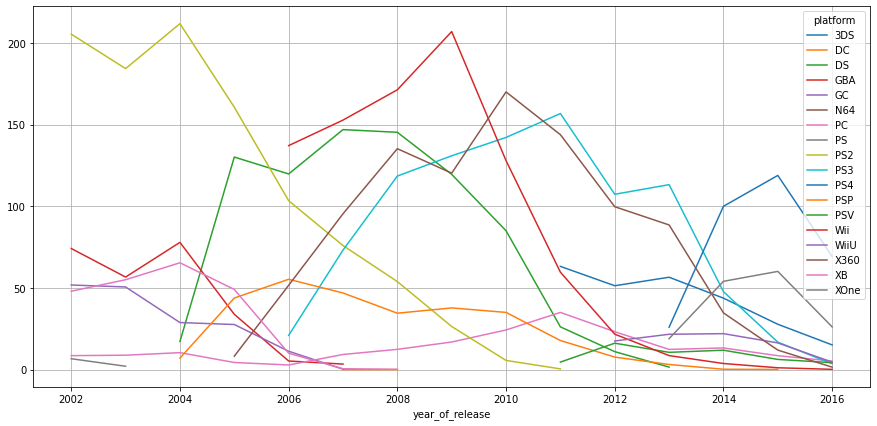

In [25]:
#Проанализировав 2 таблицы ("top-15"), выбираем период анализа - 15 лет максимальной успешности игр
games_df2 = games_df.query("2002 <= year_of_release <= 2016")
#построим график распределения по годам
games_df2.pivot_table(index='year_of_release', 
                      columns = 'platform', 
                      values='total_sales', 
                      aggfunc='sum').plot(grid=True, figsize=(15, 7))
display(games_df2.pivot_table(index='year_of_release', 
                      columns = 'platform', 
                      values='total_sales', 
                      aggfunc='sum')) 
plt.show()

**Ответ на вопрос 3.2.**

Для платформ, которые пользуются популярностью, срок использования от 8 до 12 лет. Можно проследить, как менялись поколения для приставок PlayStation:

PS 1994-2003  
PS2 2000-2011  
PS3 2006-2016  
PS4 2013-2023  
Итак, каждые 5-7 лет Sony выпускает новую платформу с лучшими техническими параметрами, но игры на предыдущей платформе еще существуют на рынке 3 года.

•	3.3. Возьмите данные за соответствующий **актуальный период.** Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
•	3.4. Не учитывайте в работе данные за **предыдущие годы.**

**Ответы на вопросы 3.3 - 3.4**  
Актуальным периодом по продажам считаем 2013 - 2016 год.

Появление на рынке новой платформы PS4 говорит от том, что она просуществует 2-4 года и топ продаж для этой платформы ожидается на 2017 год.  
После падения суммарных продаж с 2013 года появилась тенденция к росту продаж игр за счет их качества, а не количества.  
Большинство больших разработчиков создают игры за 2-4 года, так что в 2017 попадут игры, разработка которых ведется с 2013 года, а хорошие игры на рынке продаются в течении нескольких лет.

In [26]:
games_df3 = games_df.query("2013 <= year_of_release")
games_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           1256 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


In [27]:
games_df3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


•	3.5. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


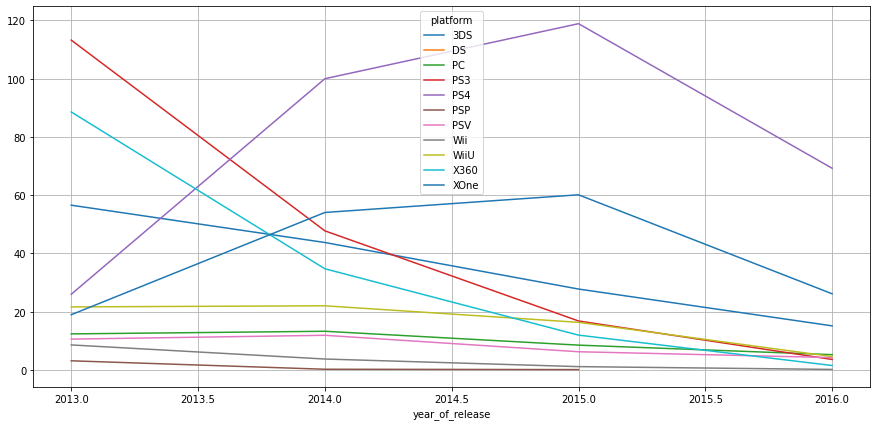

In [28]:
#Определим самые прибыльные платформы за актуальный период (из games_df3)
#best_sales_platform_df = pd.pivot_table(games_df3, index=['platform','year_of_release'], 
#                                     values='total_sales', aggfunc = 'sum')
#best_sales_platform_df = pd.pivot_table(games_df3, index=['platform'],columns=['year_of_release'],values='total_sales', aggfunc = 'sum')
best_sales_platform_df = pd.pivot_table(games_df3, index=['year_of_release'],columns=['platform'], 
                                     values='total_sales', aggfunc = 'sum')
display(best_sales_platform_df )
best_sales_platform_df.plot(grid=True, figsize=(15, 7)); #x='year_of_release');


**Ответ на вопрос 3.5**  
Топ 5 платформ по миру (2013-2016): PS4, PS3, XOne, X360 и 3DS. 
Продажи росли у PS4, XOne, 3DS, WiiU и PSV, так как они заменяли предыдущее поколение игровых приставок. На убыль шли приставки предыдущего поколения PS3, X360, DS, Wii и PSP соответственно, и у PC.

•	3.6. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [29]:
#plt.figure(figsize=(10,5))
#boxplot(x='total_sales', y='platform', data=games_df3.reset_index()); 
#games_df3.boxplot(x='total_sales', y='platform')# , data=games_df3.reset_index()); 
#это получается мне надо total_strim поменять?
#и 'platform заменить на топ 5 платформ?

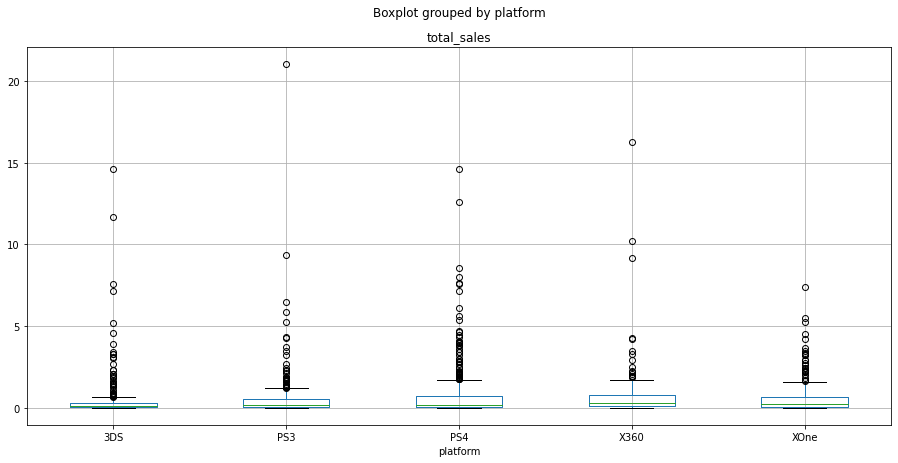

In [30]:
# построим общую диаграмму размаха по TOP5 платформам
games_df4=games_df3.query('platform == ["PS4","PS3","XOne","X360","3DS"]')
games_df4.boxplot(column = 'total_sales', by='platform',figsize=(15, 7))
plt.show()
#games_df3['total_sales'].describe()
#games_df3.describe()

In [31]:
games_df4.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.04,0.090,0.280,14.60
PS3,345.0,0.525884,1.451939,0.01,0.04,0.150,0.510,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.200,0.730,14.63
X360,186.0,0.735484,1.663275,0.01,0.08,0.265,0.795,16.27
XOne,247.0,0.645020,1.036139,0.01,0.06,0.220,0.685,7.39


**Ответ на вопрос 3.6**  
Таблица вверху подтверждает выводы о смене платформ у ведущих разработчиков игр. Среднее арифметическое (mean) и медиана (колонка 50%) практически всегда больше у "нового поколения" приставок.

•	3.7. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Для диагностики возьмем платформу PS4, т.к. у этой платформы значительные продажи в 2016 году.

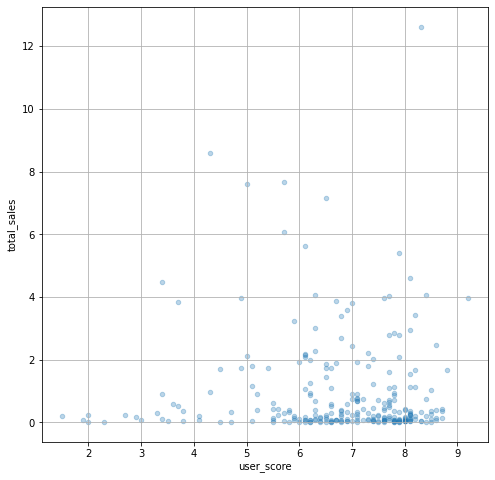

In [32]:
# выведем таблицу рассеивания по платформе PS4, отобразив отзывы пользователей
games_df3[games_df3['platform']=='PS4'].plot(x='user_score',
                                             y='total_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.show()

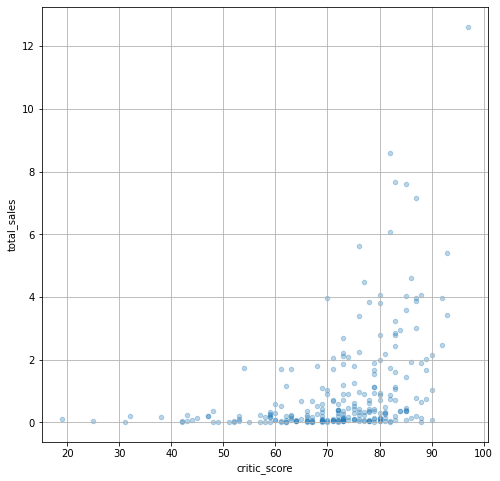

In [33]:
# выведем таблицу рассеивания по платформе PS4, отобразив оценки критиков
games_df3[games_df3['platform']=='PS4'].plot(x='critic_score', 
                                             y='total_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.show()

In [34]:
# вычислим корреляционную матрицу, диапазон элементов которой равен [-1, 1], 
#по умолчанию она использует коэффициент корреляции Пирсона. 
data_for_corr= games_df3.loc[:,['platform','total_sales', 'critic_score', 'user_score']]
data_ps4=data_for_corr[data_for_corr['platform']=='PS4']
display(data_for_corr[data_for_corr['platform']=='PS4'].corr() )
#display(data_for_corr.corr())
data_ps4_cor = data_ps4['user_score'].corr(data_ps4['total_sales'])
print('Корреляция между продажами в мире и оценками пользователей:\n(пересечение user_score и total_sales) {}'.
      format(data_ps4['user_score'].corr(data_ps4['total_sales']))) 

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Корреляция между продажами в мире и оценками пользователей:
(пересечение user_score и total_sales) -0.031957110204556376


In [35]:
print('Корреляция между продажами в мире и оценками критиков:\n(пересечение critic_score и total_sales) {}'.
        format(data_ps4['critic_score'].corr(data_ps4['total_sales'])))

Корреляция между продажами в мире и оценками критиков:
(пересечение critic_score и total_sales) 0.40656790206178095


**Ответ на задание 3.7**  
Корреляция между продажами в мире и оценками пользователей *слабая отрицательная*. Корреляция между продажами в мире и оценками критиков *СРЕДНЯЯ ПОЛОЖИТЕЛЬНАЯ*, взаимосвязь есть.

•	3.8. Соотнесите выводы с продажами игр на других платформах.

In [36]:
# Делаем по аналогии с 3.7 для "PS3","XOne","X360","3DS"

In [37]:
display( data_for_corr[data_for_corr['platform']=='PS3'].corr() )

,total_sales,critic_score,user_score
total_sales,1.000000,0.334285,0.002394
critic_score,0.334285,1.000000,0.599920
user_score,0.002394,0.599920,1.000000


In [38]:
display( data_for_corr[data_for_corr['platform']=='XOne'].corr() )

,total_sales,critic_score,user_score
total_sales,1.000000,0.416998,-0.068925
critic_score,0.416998,1.000000,0.472462
user_score,-0.068925,0.472462,1.000000


In [39]:
display( data_for_corr[data_for_corr['platform']=='X360'].corr() )

,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


In [40]:
display( data_for_corr[data_for_corr['platform']=='3DS'].corr() )

,total_sales,critic_score,user_score
total_sales,1.000000,0.357057,0.241504
critic_score,0.357057,1.000000,0.769536
user_score,0.241504,0.769536,1.000000


**Ответ на задание 3.8**  
Картина различается: 
1. Для "PS3","XOne","X360" корреляция между продажами в мире и оценками пользователей *слабая* (0.002,-0.07,-0.01 соответственно), взаимосвязи нет. 
2. Для "3DS" корреляция между продажами в мире и оценками пользователей *СРЕДНЯЯ ПОЛОЖИТЕЛЬНАЯ*. (0,24), взаимосвязь есть.


3. Для всех исследованных игр корреляция между продажами в мире и оценками критиков *СРЕДНЯЯ ПОЛОЖИТЕЛЬНАЯ* (0.33,0.42,0.35, 0,36), взаимосвязь есть.

•	3.9. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

,genre,total_sales
1,adventure,0.05
5,puzzle,0.10
11,strategy,0.10
9,simulation,0.15
3,misc,0.16
7,role-playing,0.18
0,action,0.19
6,racing,0.19
2,fighting,0.21
10,sports,0.22


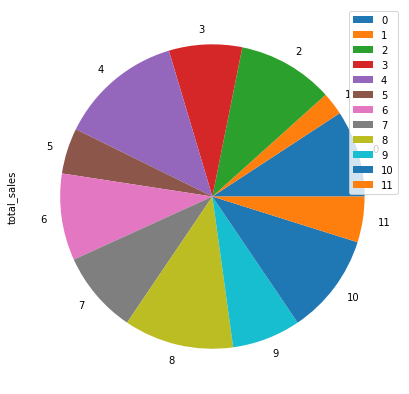

In [41]:
#Посмотрим на общее распределение игр по жанрам.

# посмотрим популярность жанров на всех платформах за все время (ВСЕ ГОДЫ)
games_by_genre = games_df.pivot_table(index='genre', values='total_sales', aggfunc='median').reset_index()
display(games_by_genre.sort_values('total_sales'))
#games_by_genre.boxplot(column='total_sales', by='genre', figsize=(25,7))
games_by_genre.plot.pie(y='total_sales', x='genre',figsize=(25,7))
plt.show()
#games_by_genre.plot(grid=True, figsize=(12, 5))
#plt.show()

**Ответ на задание 3.9**  
Самые прибыльные жанры игр - platform (платформер) и shooter (стрелялка). Ниже всего прибьли у adventure (приключение) и puzzle (паззл).

<div class="alert alert-block alert-info">
<b>Вывод 3:</b>  
    
3.1. Данные по всем периодам не важны.  
    
3.2. Для платформ, которые пользуются популярностью, срок использования от 8 до 12 лет. Можно проследить, как менялись поколения для приставок PlayStation: PS 1994-2003, PS2 2000-2011, PS3 2006-2016, PS4 2013-2023.  
Итак, каждые 5-7 лет Sony выпускает новую платформу с лучшими техническими параметрами, но игры на предыдущей платформе еще существуют на рынке 3 года.  
    
3.3 - 3.4. Актуальным периодом по продажам считаем 2013 - 2016 год.  Появление на рынке новой платформы PS4 говорит от том, что она просуществует 2-4 года и топ продаж для этой платформы ожидается на 2017 год. После падения суммарных продаж с 2013 года появилась тенденция к росту продаж игр за счет их качества, а не количества. Большинство больших разработчиков создают игры за 2-4 года, так что в 2017 попадут игры, разработка которых ведется с 2013 года, а хорошие игры на рынке продаются в течении нескольких лет.    
3.5. Топ 5 платформ по миру (2013-2016): PS4, PS3, XOne, X360 и 3DS. Продажи росли у PS4, XOne, 3DS, WiiU и PSV, так как они заменяли предыдущее поколение игровых приставок. На убыль шли приставки предыдущего поколения PS3, X360, DS, Wii и PSP соответственно, и у PC.
3.6. Таблица в п.3.6 подтверждает выводы о смене платформ у ведущих разработчиков игр. Среднее арифметическое (mean) и медиана (колонка 50%) практически всегда больше у "нового поколения" приставок.    
3.7. Корреляция между продажами в мире и оценками пользователей слабая отрицательная. Корреляция между продажами в мире и оценками критиков СРЕДНЯЯ ПОЛОЖИТЕЛЬНАЯ, взаимосвязь есть.  
    
3.8. Картина различается: 
1. Для "PS3","XOne","X360" корреляция между продажами в мире и оценками пользователей *слабая* (0.002,-0.07,-0.01 соответственно), взаимосвязи нет. 
2. Для "3DS" корреляция между продажами в мире и оценками пользователей *СРЕДНЯЯ ПОЛОЖИТЕЛЬНАЯ*. (0,24), взаимосвязь есть.

3. Для всех исследованных игр корреляция между продажами в мире и оценками критиков *СРЕДНЯЯ ПОЛОЖИТЕЛЬНАЯ* (0.33,0.42,0.35, 0,36), взаимосвязь есть.   
    
3.9. Самые прибыльные жанры игр - platform (платформер) и shooter (стрелялка). Ниже всего прибьли у adventure (приключение) и puzzle (паззл).    
</div>

#### шаг . Составьте портрет пользователя каждого региона

4.1. Определите для пользователя каждого региона (NA, EU, JP):  

•	4.1.1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [42]:
#na_actual_data_games_sales = games_df.query('na_sales > 0')
#Доли от общей суммы по строкам
platform_sales_pt=games_df.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales','other_sales'], aggfunc='sum') 
platform_sales_pt['eu_sales_share']=platform_sales_pt['eu_sales']/(platform_sales_pt['eu_sales']+platform_sales_pt['na_sales']+platform_sales_pt['jp_sales']+platform_sales_pt['other_sales'])
platform_sales_pt['jp_sales_share']=platform_sales_pt['jp_sales']/(platform_sales_pt['eu_sales']+platform_sales_pt['na_sales']+platform_sales_pt['jp_sales']+platform_sales_pt['other_sales'])
platform_sales_pt['na_sales_share']=platform_sales_pt['na_sales']/(platform_sales_pt['eu_sales']+platform_sales_pt['na_sales']+platform_sales_pt['jp_sales']+platform_sales_pt['other_sales'])
platform_sales_pt

,eu_sales,jp_sales,na_sales,other_sales,eu_sales_share,jp_sales_share,na_sales_share
platform,,,,,,,
2600,4.86,0.00,80.78,0.84,0.056198,0.000000,0.934089
3DO,0.00,0.10,0.00,0.00,0.000000,1.000000,0.000000
3DS,61.27,100.62,82.65,13.27,0.237656,0.390287,0.320585
DC,1.69,8.56,5.43,0.27,0.105956,0.536677,0.340439
DS,188.41,175.02,380.31,59.04,0.234697,0.218017,0.473741
GB,47.51,85.12,113.64,8.16,0.186731,0.334552,0.446645
GBA,74.59,46.56,184.12,7.61,0.238398,0.148811,0.588468
GC,38.32,21.34,131.94,5.13,0.194785,0.108474,0.670665
GEN,5.52,2.67,19.27,0.89,0.194709,0.094180,0.679718


platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

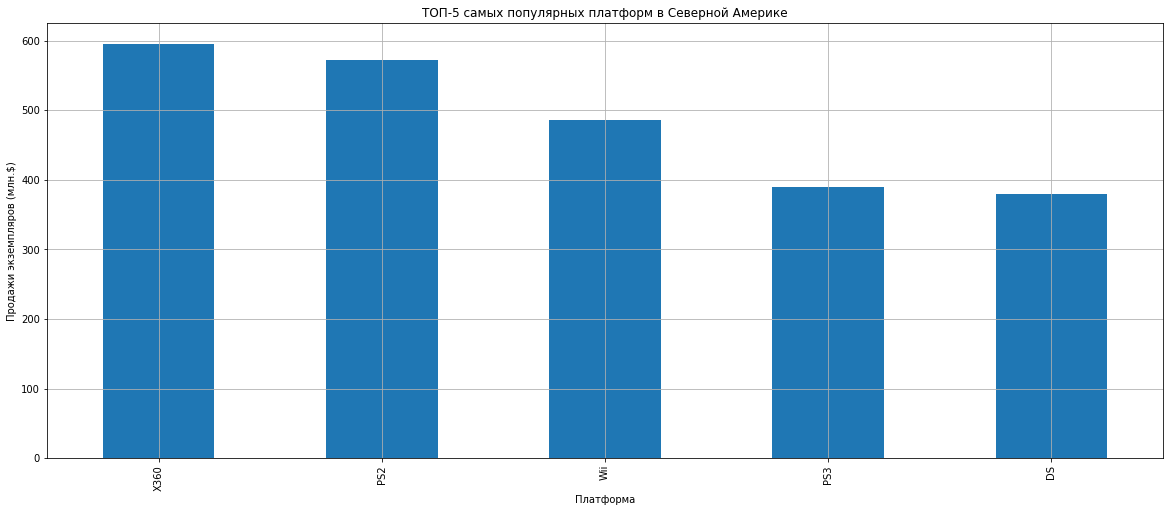

In [43]:
# ТОП-5 самых популярных платформ в Северной Америке по общей таблице
#группируем по платформе
platform_na_all = games_df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
display(platform_na_all)
#построим гистограмму
platform_na_all.plot(x = 'platform', y = 'na_sales', kind = 'bar', figsize=(20,8), 
                     grid=True, title = 'ТОП-5 самых популярных платформ в Северной Америке')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.$)')
plt.show()

platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64

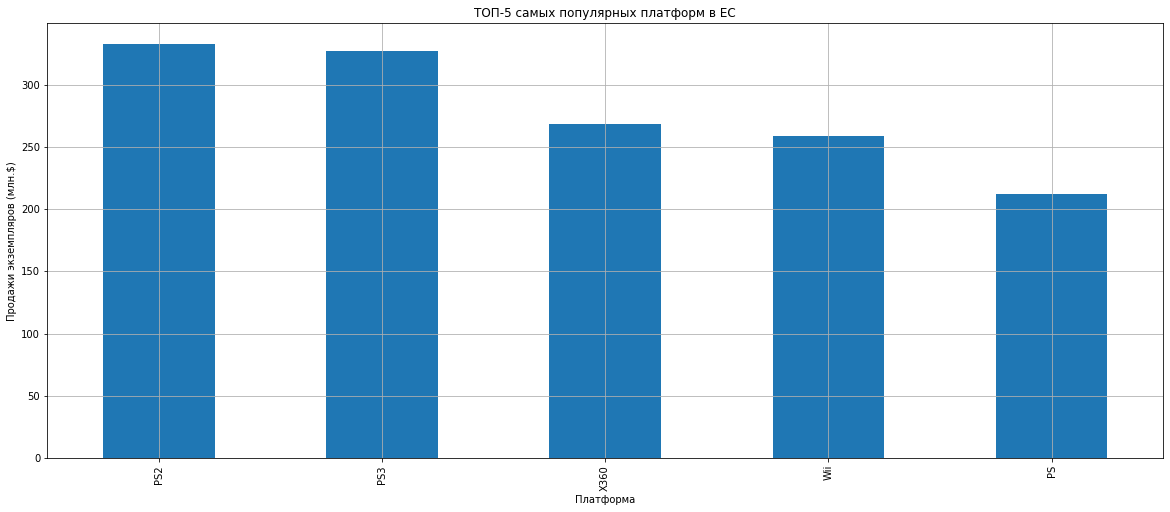

In [44]:
# ТОП-5 самых популярных платформ в ЕС по общей таблице
#группируем по платформе
platform_eu_all = games_df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
display(platform_eu_all)
#построим гистограмму
platform_eu_all.plot(x = 'platform', y = 'eu_sales', kind = 'bar', figsize=(20,8), 
                     grid=True, title = 'ТОП-5 самых популярных платформ в ЕС')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.$)')
plt.show()

platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64

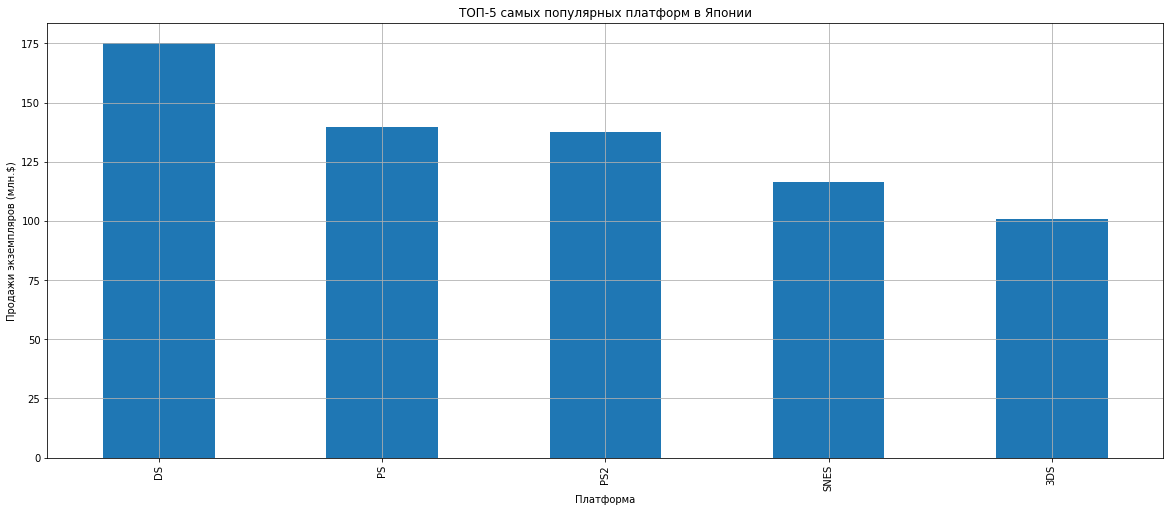

In [45]:
# ТОП-5 самых популярных платформ в Японии по общей таблице
#группируем по платформе
platform_jp_all = games_df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
display(platform_jp_all)
#построим гистограмму
platform_jp_all.plot(x = 'platform', y = 'jp_sales', kind = 'bar', figsize=(20,8), 
                     grid=True, title = 'ТОП-5 самых популярных платформ в Японии')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.$)')
plt.show()

**Ответ на задание 4.1.1**  
Самые популярные платформы:
1) В Северной Америке - от Microsoft, Sony и Nintendo. MIcrosoft - резидент США, поэтому является лидером.;
2) В Европе - от Sony, Microsoft и Nintendo. Смешанное влияние американских и японских фирм;
3) В Японии - от Sony и Nintendo - только японские фирмы.

•	4.1.2. Самые популярные жанры (топ-5). Поясните разницу.

genre
action      863.17
sports      671.20
shooter     584.83
platform    444.44
misc        399.57
Name: na_sales, dtype: float64

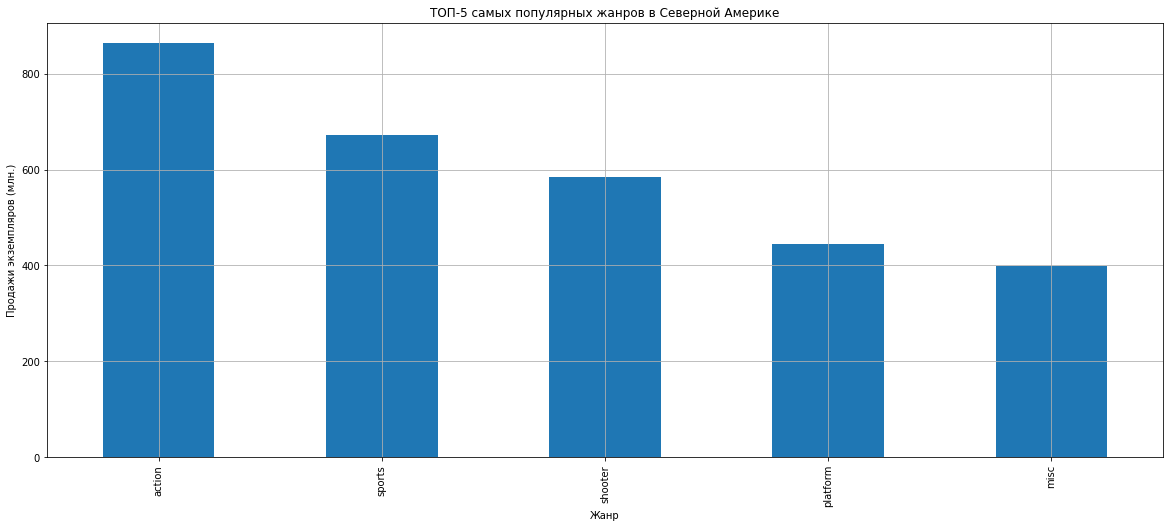

In [46]:
# ТОП-5 самых популярных жанров в Северной Америке по общей таблице
#переменной genre_count_full присваиваем сумму общих продаж по всем жанрам
genre_count_full = games_df.groupby('genre')['total_sales'].sum()
#группируем по жанрам
genre_na = games_df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
display (genre_na)
#построим гистограмму
genre_na.plot(x = 'genre', y = 'na_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в Северной Америке')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Жанр')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()


In [47]:
genre_percent_na = genre_na / genre_count_full * 100
display('Доля продаж в Северной Америке:')
display(genre_percent_na.sort_values(ascending=False).head(5))

'Доля продаж в Северной Америке:'

genre
shooter     56.160214
platform    53.835625
sports      51.249551
misc        50.559921
action      50.286044
dtype: float64

genre
action     510.99
sports     371.33
shooter    314.52
racing     234.49
misc       210.60
Name: eu_sales, dtype: float64

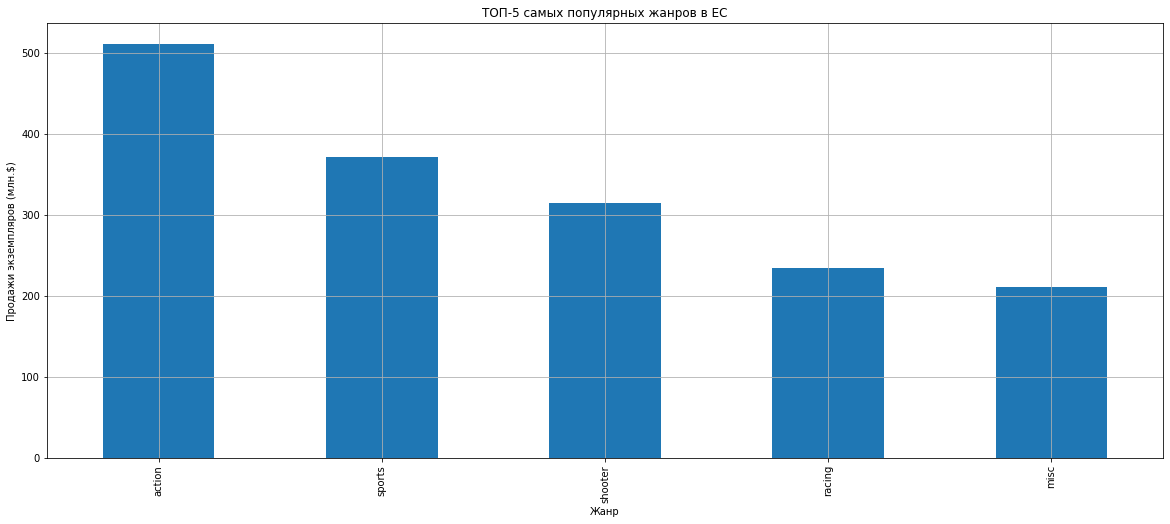

In [48]:
# ТОП-5 самых популярных жанров в ЕС по общей таблице
#группируем по жанрам
genre_eu = games_df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
display (genre_eu)
#построим гистограмму
genre_eu.plot(x = 'genre', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в ЕС')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Жанр')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.$)')
plt.show()


In [49]:
genre_percent_eu = genre_eu/ genre_count_full * 100
display('Доля продаж в ЕС:')
display(genre_percent_eu.sort_values(ascending=False).head(5))

'Доля продаж в ЕС:'

genre
racing     32.410952
shooter    30.202812
action     29.768951
sports     28.352944
misc       26.648446
dtype: float64

genre
role-playing    353.39
action          160.14
sports          134.93
platform        130.71
misc            107.02
Name: jp_sales, dtype: float64

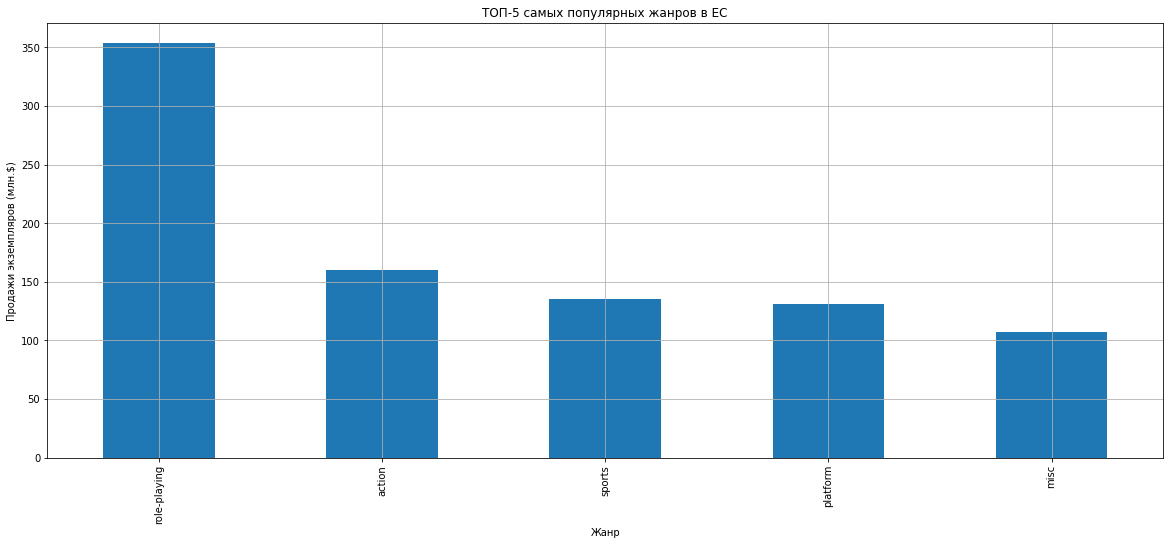

In [50]:
# ТОП-5 самых популярных жанров в Японии по общей таблице
#группируем по жанрам
genre_jp = games_df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
display (genre_jp)
#построим гистограмму
genre_jp.plot(x = 'genre', y = 'eu_sales', kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных жанров в ЕС')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Жанр')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.$)')
plt.show()


In [51]:
genre_percent_jp = genre_jp/ genre_count_full * 100
display('Доля продаж в Японии:')
display(genre_percent_jp.sort_values(ascending=False).head(5))

'Доля продаж в Японии:'

genre
role-playing    37.954848
platform        15.833081
misc            13.541864
sports          10.302595
action           9.329341
dtype: float64

**Ответ на задание 4.1.2**  
Самые популярные жанры:
1) В Северной Америке -action, sports, shooter, platform, misc. Эти жанры для экшна, выброса адреналина;
2) В Европе - action, sports, shooter, racing, misc. Результаты практически как в Северной Америке.;
3) В Японии - role-playing, action, sports, platform, misc. Результаты сильно отличаются от США и ЕС.

•	4.1.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Напомним рашифровку рейтингов (ru.wikipedia.org):  
**«E» («Everyone») — «Для всех»**: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально **"K-A" ("Kids to Adults")**  
**«M» («Mature») — «Для взрослых»**: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.  
**«T» («Teen») — «Подросткам»**: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.  
**«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»**: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.  
**«AO» («Adults Only 18+») — «Только для взрослых»**: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.  
**«EC» («Early childhood») — «Для детей младшего возраста»**: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.  
**«RP» («Rating Pending») — «Рейтинг ожидается»**: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

In [52]:
#группируем по жанрам в Северной Америке
display ( games_df.groupby('rating')['na_sales'].sum().sort_values(ascending=False))

rating
E       1274.24
T        747.60
M        742.89
E10+     348.06
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64

In [53]:
#группируем по жанрам в ЕС
display ( games_df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False))

rating
E       703.87
M       480.00
T       421.79
E10+    183.62
AO        0.61
EC        0.11
RP        0.03
Name: eu_sales, dtype: float64

In [54]:
#группируем по жанрам в Японии 
display ( games_df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False))

rating
E       197.96
T       150.70
M        63.58
E10+     41.66
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64

**Ответ на задание 4.1.3**  
Самые популярные рейтинги:
1) В Северной Америке - E, T, M, E10+, EC. Эти жанры для "Для всех" или "Для взрослых";  
2) В Европе -  E, M, T, E10+, AO. Эти тоже жанры для "Для всех" или "Для взрослых";  
3) В Японии - E, T, M, E10+, AO. Эти тоже жанры для "Для всех" или "Для взрослых".  
Результаты практически **одинаковы во всех регионах.**

<div class="alert alert-block alert-info">
<b>Вывод 4:</b>  
    
4.1.1. Самые популярные платформы:
    1) В Северной Америке - от Microsoft, Sony и Nintendo. MIcrosoft - резидент США, поэтому является лидером.;
    2) В Европе - от Sony, Microsoft и Nintendo. Смешанное влияние американских и японских фирм;
    3) В Японии - от Sony и Nintendo - только японские фирмы.  
    
4.1.2.Самые популярные жанры:
    1) В Северной Америке -action, sports, shooter, platform, misc. Эти жанры для экшна, выброса адреналина; 
    2) В Европе - action, sports, shooter, racing, misc. Результаты практически как в Северной Америке.; 
    3) В Японии - role-playing, action, sports, platform, misc. Результаты сильно отличаются от США и ЕС.    

4.1.3. Самые популярные рейтинги:
    1) В Северной Америке - E, T, M, E10+, EC. Эти жанры для "Для всех" или "Для взрослых";  
    2) В Европе -  E, M, T, E10+, AO. Эти тоже жанры для "Для всех" или "Для взрослых";  
    3) В Японии - E, T, M, E10+, AO. Эти тоже жанры для "Для всех" или "Для взрослых".  
    Результаты практически **одинаковы во всех регионах.**    
</div>

#### шаг . Проверьте гипотезы

•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Актуальным периодом по продажам считаем 2013 - 2016 год. (см. п.3)
Для проверки гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" в качестве нулевой и альтернативной гипотезы мы взяли следующее:
H0: средние рейтинги по платформам одинаковые
H1: средние рейтинги по платформам разные

In [55]:
# две выборки по необходимым платформам
data_xbox_1 = games_df3[games_df3['platform'] == 'XOne']
#print (len(data_xbox_1) )
data_pc = games_df3[games_df3['platform'] == 'PC']

#обозначили две выборки конкретных столбцов с пользовательскими рейтингами.
#Убираем NaN
xbox_1 = data_xbox_1['user_score'].dropna()
pc_1 = data_pc['user_score'].dropna()
print( len(xbox_1),len(pc_1) )
alpha = 0.05 # критический уровень статистической значимости
#если p-value окажется меньше него - отвергнем гипотезу
#results = st.ttest_ind(xbox_1,pc_1)
st.ttest_ind(xbox_1.dropna(), pc_1.dropna())
#Ttest_indResult(statistic=0.88752464718609214, pvalue=0.38439692093551037)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print ('Средние значения рейтингов Xbox 1 и PC:',xbox_1.mean(), pc_1.mean() )

182 155


NameError: name 'results' is not defined

•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.


In [56]:
#H0: средние рейтинги по жанрам одинаковые
#H1: средние рейтинги по жанрам разные
# две выборки по необходимым жанрам
data_action = games_df3[games_df3['genre'] == 'action']
#print (len(data_xbox_1) )
data_sports = games_df3[games_df3['genre'] == 'sports']
#обозначили две выборки конкретных столбцов с пользовательскими рейтингами.
action_1 = data_action['user_score'].dropna()
sports_1 = data_sports['user_score'].dropna()
#display(action_1, sports_1)
alpha = 0.05 # критический уровень статистической значимости
#если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(action_1,sports_1)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print ('Средние значения жанров action и sports:',action_1.mean(), sports_1.mean() )

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу
Средние значения жанров action и sports: 6.837532133676092 5.238124999999999


Поясните:
•	Как вы сформулировали нулевую и альтернативную гипотезы;  
•	Какой критерий применили для проверки гипотез и почему.

**Вывод 5**  
1. Для проверки гипотез использовали функцию ttest_ind пакета scipy согласно технической документации. Пороговое значение alpha = 0,05
2. Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - отвергнута.
3. Гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" - подтверждена.


<div class="alert alert-block alert-info">
<b>Общие выводы :</b> 
 
    
1. Мы выгрузили таблицу и присвоили переменной games_df.Импортировали все необходимые библиотеки, которые будут нужны для дальнейшей работы. Далее мы с помощью метода info() проверили, какие типы данные в каждом столбце и выяснили, что необходимо изменить тип данных в двух столбцах: Year_of_Release (с float64 на int), User_Score (с object на float64).  
Проверили уникальные значения в ячейках таблицы и выяснили, что с некоторыми значениями необходимо поработать, а именно:
Столбцы Year_of_Release, Genre, Critic_Score, User_Score и Rating - содержат NaN;  
столбец User_Score также содержит tbd.
    
2.    
    
    2.1. Заменили названия столбцов (привели к нижнему регистру).  
    2.2. Нет наименования игры у 2 строк, по данной ячейке мы не можем рассчитать среднее значение или медиану.   
Оставить поле пустым тоже нельзя, т.к. непонятно о какой видеоигре идет речь, поэтому мы принимаем решение удалить эти 2 строки, иначе они повлияют на нашу статистику. Насчет появления пропуска в данном столбце можно сказать, что или его забыли указать при заведении данных, или у игры не было утверждено официальное название и поэтому ячейка оказалась пуста.
Столбец genre так же сложно подвести к какому-либо значению, т.к. необходимо знать конкретную игру. Также удаляем строки с пустыми значениями. Пропуск в данном столбце мог возникнуть из-за того, что при заполнении данных об игре его забыли указать или не определились, к какому именно жанру относится видеоигра.  
    2.3. В столбце rating есть два значения 'K-A' и 'E10+' - это два значения носящие один и тот же смысл. Переименуем 'K-A' в 'E10+' для унификации.  
    2.4. Видно, что много недостает значений в колонках с оценками(critic_score, user_score, rating). Причина, видимо, что игра не проходила оценку у критиков, пользователей или организации ESRB. Возможно, отсутствие в таблице названия и жанра - человеческая ошибка.  
    2.5. Судя по общему содержанию, а так же по описанию столбца (оценка пользователей (максимум 10)), тип данных 
должен быть float. Поэтому предлагаем считать данное значение (tbd) пустым и изменить на NaN.  
    2.6. Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец total_sales.    
    
3.  
    
    3.1. Данные по всем периодам не важны.  
    
    3.2. Для платформ, которые пользуются популярностью, срок использования от 8 до 12 лет. Можно проследить, как менялись поколения для приставок PlayStation: PS 1994-2003, PS2 2000-2011, PS3 2006-2016, PS4 2013-2023.  
Итак, каждые 5-7 лет Sony выпускает новую платформу с лучшими техническими параметрами, но игры на предыдущей платформе еще существуют на рынке 3 года.  
    
    3.3 - 3.4. Актуальным периодом по продажам считаем 2013 - 2016 год.  Появление на рынке новой платформы PS4 говорит от том, что она просуществует 2-4 года и топ продаж для этой платформы ожидается на 2017 год. После падения суммарных продаж с 2013 года появилась тенденция к росту продаж игр за счет их качества, а не количества. Большинство больших разработчиков создают игры за 2-4 года, так что в 2017 попадут игры, разработка которых ведется с 2013 года, а хорошие игры на рынке продаются в течении нескольких лет.    
    3.5. Топ 5 платформ по миру (2013-2016): PS4, PS3, XOne, X360 и 3DS. Продажи росли у PS4, XOne, 3DS, WiiU и PSV, так как они заменяли предыдущее поколение игровых приставок. На убыль шли приставки предыдущего поколения PS3, X360, DS, Wii и PSP соответственно, и у PC.
    3.6. Таблица в п.3.6 подтверждает выводы о смене платформ у ведущих разработчиков игр. Среднее арифметическое (mean) и медиана (колонка 50%) практически всегда больше у "нового поколения" приставок.    
    3.7. Корреляция между продажами в мире и оценками пользователей слабая отрицательная. Корреляция между продажами в мире и оценками критиков СРЕДНЯЯ ПОЛОЖИТЕЛЬНАЯ, взаимосвязь есть.  
    3.8. Картина различается: 
       1. Для "PS3","XOne","X360" корреляция между продажами в мире и оценками пользователей *слабая* (0.002,-0.07,-0.01 соответственно), взаимосвязи нет. 
       2. Для "3DS" корреляция между продажами в мире и оценками пользователей *СРЕДНЯЯ ПОЛОЖИТЕЛЬНАЯ*. (0,24), взаимосвязь есть.
       3. Для всех исследованных игр корреляция между продажами в мире и оценками критиков *СРЕДНЯЯ ПОЛОЖИТЕЛЬНАЯ* (0.33,0.42,0.35, 0,36), взаимосвязь есть.   
    
    3.9. Самые прибыльные жанры игр - platform (платформер) и shooter (стрелялка). Ниже всего прибьли у adventure (приключение) и puzzle (паззл).        
</div>

4. 4.1.1. Самые популярные платформы:
    1) В Северной Америке - от Microsoft, Sony и Nintendo. MIcrosoft - резидент США, поэтому является лидером.;
    2) В Европе - от Sony, Microsoft и Nintendo. Смешанное влияние американских и японских фирм;
    3) В Японии - от Sony и Nintendo - только японские фирмы.  
    
4.1.2.Самые популярные жанры:
    1) В Северной Америке -action, sports, shooter, platform, misc. Эти жанры для экшна, выброса адреналина; 
    2) В Европе - action, sports, shooter, racing, misc. Результаты практически как в Северной Америке.; 
    3) В Японии - role-playing, action, sports, platform, misc. Результаты сильно отличаются от США и ЕС.    

4.1.3. Самые популярные рейтинги:
    1) В Северной Америке - E, T, M, E10+, EC. Эти жанры для "Для всех" или "Для взрослых";  
    2) В Европе -  E, M, T, E10+, AO. Эти тоже жанры для "Для всех" или "Для взрослых";  
    3) В Японии - E, T, M, E10+, AO. Эти тоже жанры для "Для всех" или "Для взрослых".  
    Результаты практически **одинаковы во всех регионах.**    
    
5.  
    5.1. Для проверки гипотез использовали функцию ttest_ind пакета scipy согласно технической документации. Пороговое значение alpha = 0,05
    
    5.2. Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - отвергнута.  
    
    5.3. Гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" - подтверждена.    
</div>